#### Учебный проект в рамках профессии Data Science Яндекс Практикума

### Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 

## 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<AxesSubplot:>

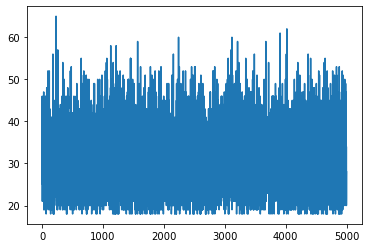

In [4]:
data['Возраст'].plot()

<AxesSubplot:>

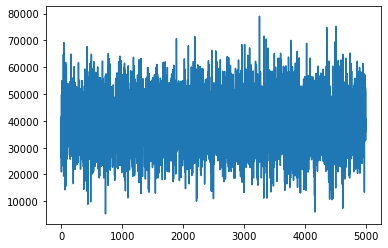

In [5]:
data['Зарплата'].plot()

Посмотрели на данные, распределение количественных переменных. Увидели, что аномальных распределений и пропусков нет, можно приступать к следующим шагам.

## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответим на вопросы ниже и обоснуем решение**


Признаки умножают на обратимую матрицу. <br>
Изменится ли качество линейной регрессии? (Её можно обучить заново.)
a. Изменится. Приведите примеры матриц.
b. Не изменится. <br>
Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.



**Ответ:**  Качество линейной регрессии не изменится <br>
<br>
**Обоснование:** ↓

In [6]:
# Для начала обозначим наши признаки и целевые показатели

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [7]:
# Проверим качество линейной регрессии на исходных данных и запомним r2 нашей модели

class LinRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4249455028666801


In [8]:
# Сравним с результатами полученными моделью sklearn

model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4249455028666801


Посмотрим на размеры нашей матрицы

In [9]:
matrix = data.values
print(matrix.shape)

matrix_t = matrix.T
print(matrix_t.shape)

(5000, 5)
(5, 5000)


In [10]:
# Формируем матрицу признаков X (без целевого признака)

X = features.values

In [11]:
# Формируем вектор целевого признака y 

y = np.array(target)

In [12]:
# Генерируем случайную матрицу P размером 4 * 4

random_matrix = np.random.normal(0, 1000, size = (4, 4))
print(random_matrix)

[[ 1.83496184e+02  6.88018762e+02  1.70852916e+03  7.74191374e+02]
 [ 3.91769222e+02  1.17960625e+03  1.47990104e+03  7.32276170e+02]
 [ 5.08230475e-01 -5.11459281e+02  4.95852346e+02  4.44629803e+02]
 [ 2.46964579e+02 -4.64263045e+02  1.86399818e+03 -3.63928484e+02]]


In [13]:
# Проверяем, чтобы случайная матрица P была обратимой

random_matrix_inv = np.linalg.inv(random_matrix)
print(random_matrix_inv)

[[-0.00567972  0.00475144  0.00265877  0.00072637]
 [ 0.0007938  -0.00022546 -0.00119886 -0.00022968]
 [ 0.00092777 -0.00060553 -0.00039548  0.00027206]
 [-0.00011504  0.00041052  0.00130802 -0.00056843]]


In [14]:
aa1 = random_matrix*random_matrix_inv
a1a = random_matrix_inv*random_matrix

print(aa1)
print(' - - - ')
print(a1a)
print('- - -')

# Проверим детерминанты матриц
det_aa1 = round(np.linalg.det(aa1), 2)
det_a1a = round(np.linalg.det(a1a), 2)

if det_aa1  == det_a1a:
    print('Детерминанты равны, матрицы обратимы')
else:
    print('Матрицы необратимы')

[[-1.04220693e+00  3.26908140e+00  4.54258367e+00  5.62346803e-01]
 [ 3.10988153e-01 -2.65951386e-01 -1.77418830e+00 -1.68190838e-01]
 [ 4.71519776e-04  3.09705190e-01 -1.96101514e-01  1.20964134e-01]
 [-2.84109576e-02 -1.90587140e-01  2.43814491e+00  2.06868594e-01]]
 - - - 
[[-1.04220693e+00  3.26908140e+00  4.54258367e+00  5.62346803e-01]
 [ 3.10988153e-01 -2.65951386e-01 -1.77418830e+00 -1.68190838e-01]
 [ 4.71519776e-04  3.09705190e-01 -1.96101514e-01  1.20964134e-01]
 [-2.84109576e-02 -1.90587140e-01  2.43814491e+00  2.06868594e-01]]
- - -
Детерминанты равны, матрицы обратимы


In [15]:
# Вычисляем преобразованную матрицу признаков X' = XP

X_modified = X.dot(random_matrix)

In [16]:
# Проверяем отличается ли X' от X

data_X = pd.DataFrame (X)
data_X_modified = pd.DataFrame (X_modified)

print(data_X.describe())
print(data_X_modified.describe())

                 0            1             2            3
count  5000.000000  5000.000000   5000.000000  5000.000000
mean      0.499000    30.952800  39916.360000     1.194200
std       0.500049     8.440807   9900.083569     1.091387
min       0.000000    18.000000   5300.000000     0.000000
25%       0.000000    24.000000  33300.000000     0.000000
50%       0.000000    30.000000  40200.000000     1.000000
75%       1.000000    37.000000  46600.000000     2.000000
max       1.000000    65.000000  79000.000000     6.000000
                  0             1             2             3
count   5000.000000  5.000000e+03  5.000000e+03  5.000000e+03
mean   32799.554683 -2.037929e+07  1.984151e+07  1.777062e+07
std     5968.055377  5.063669e+06  4.908709e+06  4.401776e+06
min    10959.466722 -4.035716e+07  2.661188e+06  2.371594e+06
25%    28751.499624 -2.380286e+07  1.655011e+07  1.482212e+07
50%    32722.114376 -2.052103e+07  1.997246e+07  1.789188e+07
75%    36651.953486 -1.699674e+07  

In [17]:
# Обновим наши переменные

features = data_X
features_modified = data_X_modified
target = pd.DataFrame (y)

In [18]:
# Сравниваем качество моделей
    
model = LinRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))


0.4249455028666801


In [19]:
model = LinRegression()
model.fit(features_modified, target)
predictions = model.predict(features_modified)
print(r2_score(target, predictions))

0.4249455028666651


**Выводы**

В матрицах с признаками X и X' (=XP) мы получили примерно такие же результаты, линейная регрессия не пострадала в качестве от преобразований с обратимой матрицей.


## 3. Алгоритм преобразования

Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.


**Алгоритм и его обоснование**


Судя по нашим расчетам выше получается, что

$$
a = Xw = X'w' = a'
$$

Чтобы доказать это, посмотрим на нашу изначальную формулу весов:

$$
w = (X^T X)^{-1} X^T y
$$

При изменении X на X' (т.е. XP) и использовании формул выше (AB..) превращается в

$$w' = ((XP)^T X P)^{-1} (XP)^T y =  P^{-1}((XP)^{T}X)^{-1}(XP)^T y = $$
$$ P^{-1}((XP)^{T}X)^{-1}P^TX^T y = P^{-1}(P^TX^TX)^{-1}P^TX^T y = $$
$$ = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}X^Ty   $$

По формуле выше мы знаем, что: 
$$ w = (X^TX)^{-1}X^Ty$$
 
Получается, что:
$$ w' = P^{-1}w $$


$$ a'=X'w' = XPP^{-1}w = Xw = a $$

Соответственно мы имеем дело с обратимыми матрицами, которые мы можем использовать для обучения моделей, a наше **а** должно с небольшими погрешностями быть практически равно **a'**



## 4. Проверка алгоритма

Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

In [20]:
class Transformation:
    
    def fit(self, data):
        self.D = np.random.normal(0,5, (data.shape[1], data.shape[1]))
        self.D_inv = np.linalg.inv(self.D)
        
    def transform_data (self, data):
        transformed_data = data.dot(self.D)
        return transformed_data 
    
    def recover_data (self, transformed_data):
        recovered_data = transformed_data.dot(self.D_inv)
        return recovered_data
    

In [21]:
# Вспомним какие у нас features и target

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [22]:
key = Transformation()

In [23]:
key.fit(features)

In [24]:
# Проверим меняются ли наши данные

features = key.transform_data(features)
print(features)

                  0              1             2              3
0    -276927.614419 -311385.713514 -41718.473263  288776.468046
1    -212201.220672 -238598.410946 -31923.583649  221358.117796
2    -117278.696055 -131862.725089 -17625.600176  122356.738798
3    -232776.286571 -261767.833777 -35123.088110  242678.997241
4    -145743.497716 -163864.586896 -21929.586614  152005.933159
...             ...            ...           ...            ...
4995 -199313.977967 -224127.180953 -30045.548602  207841.459054
4996 -292525.171723 -328946.783575 -44096.598414  305006.372151
4997 -189244.963498 -212812.247796 -28549.809364  197309.896907
4998 -182563.352115 -205285.880968 -27546.225899  190347.266270
4999 -226663.600586 -254871.830637 -34166.201766  236333.322525

[5000 rows x 4 columns]


In [25]:
# Обучим модель с измененными данными 
model = LinRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.42494550286663546


In [26]:
# Восстановим данные, проверим, что признаки изменились

features = key.recover_data(features)
print(features)

                 0     1        2             3
0     1.000000e+00  41.0  49600.0  1.000000e+00
1    -5.002221e-12  46.0  38000.0  1.000000e+00
2    -9.094947e-13  29.0  21000.0 -1.818989e-12
3     2.728484e-12  21.0  41700.0  2.000000e+00
4     1.000000e+00  28.0  26100.0 -1.818989e-12
...            ...   ...      ...           ...
4995  3.637979e-12  28.0  35700.0  2.000000e+00
4996 -1.364242e-12  34.0  52400.0  1.000000e+00
4997 -9.094947e-13  20.0  33900.0  2.000000e+00
4998  1.000000e+00  22.0  32700.0  3.000000e+00
4999  1.000000e+00  28.0  40600.0  1.000000e+00

[5000 rows x 4 columns]


In [27]:
model = LinRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4249455028666711


Результаты показали практически идентичный результат метрики r2, что и требовалось доказать